# OptiDeliver: Machine Learning for Enhanced Delivery Predictions
## Introduction

To develop a predictive framework using historical order data and external factors like weather conditions and public holidays. 

By enhancing the precision of delivery time predictions, the project aims to improve the operational efficiency of e-commerce businesses and elevate customer satisfaction by keeping consumers well-informed about their order statuses.Five machine learning models were evaluated: Logistic Regression, Decision Tree, KNN, Naive Bayes, and Random Forest. 

The Random Forest model showed superior performance, achieving an accuracy of 96.63% and an AUC of 0.59, demonstrating robust handling of the dataset's complexity and variability.


## Workflow

**1. Data Collection and Investigation**

1.1 Explore data
1.2 Merge datasets


**2. Data pre-processing**

2.1 Change data types 
2.2 Handling missing values
2.3 Remove outliers 

2.4 Create dummy variables
2.5 Feature Scaling 
2.6 Feature Engineering

2.7 Class imbalance Oversampling


**3. Test Train Split**

3.1 Feature Encoding
3.2 Feature Selection
3.3 Class imbalance Oversampling


**4. Exploratory Data Analysis (EDA)**

4.1 Bar Chart
4.2 Box Plots
4.3 Correlation Matrix


**5. Machine Learning Algorithms**

5.1 Initial Model Selection
5.2 Cross-Validation
5.3 Fine-Tune Hyperparameters for Random Forest


**6. Model Evaluation**

## 1. Data Collection and Investigation

Downloading files from kaggle.com Olist public dataset, a Brazil e-commerce platform

In [3]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import os
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime
from scipy import stats

HOME = os.path.expanduser('~')
PROJECT_DIR = os.path.join(HOME, "Desktop","BA project dataset","Retail")

os.chdir(PROJECT_DIR)
print(os.getcwd())

import warnings
warnings.filterwarnings( 'ignore' )

/Users/test/Desktop/BA project dataset/Retail


In [4]:
os.listdir()

['olist_sellers_dataset.csv',
 '.DS_Store',
 'product_category_name_translation.csv',
 'olist_orders_dataset.csv',
 'olist_order_items_dataset.csv',
 'Brazil_holiday.csv',
 'merged_ecommerce_data_lat_lng.csv',
 'olist_customers_dataset.csv',
 'olist_geolocation_dataset.csv',
 'olist_order_payments_dataset.csv',
 'olist_order_reviews_dataset.csv',
 'merged_ecommerce_data.csv',
 'olist_products_dataset.csv',
 'retail_data_weather.csv']

In [5]:
import pandas as pd

customer_d = pd.read_csv('olist_customers_dataset.csv')
geolocation_d = pd.read_csv('olist_geolocation_dataset.csv')
orders_d = pd.read_csv('olist_orders_dataset.csv')
order_items_d = pd.read_csv('olist_order_items_dataset.csv')
order_payments_d = pd.read_csv('olist_order_payments_dataset.csv')
order_reviews_d = pd.read_csv('olist_order_reviews_dataset.csv')
products_d = pd.read_csv('olist_products_dataset.csv')
sellers_d = pd.read_csv('olist_sellers_dataset.csv')
prod_catname_d = pd.read_csv("product_category_name_translation.csv")

### 1.1 Explore Data

In [6]:
customer_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [7]:
geolocation_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [8]:
orders_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [9]:
order_items_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [10]:
order_payments_d.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [11]:
order_reviews_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [12]:
products_d.info()
products_d.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [13]:
sellers_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


### 1.2 Merge datasets

In [14]:
# Merge datasets of customer, orders, products, payments, reviews, sellers and category name dataset
olist_data = orders_d.merge(customer_d, on="customer_id").merge(order_items_d, on="order_id").merge(
    products_d, on="product_id").merge(prod_catname_d, on="product_category_name").merge(
    order_payments_d, on="order_id").merge(sellers_d, on="seller_id").merge(order_reviews_d, on="order_id")

# Merge customer geolocation data
geolocation_d['customer_zip_code_prefix'] = geolocation_d['geolocation_zip_code_prefix']
geol = geolocation_d.groupby(['customer_zip_code_prefix'],as_index=False).agg({
  'geolocation_lat':'mean',
  'geolocation_lng':'mean'
})
olist_data2 = olist_data.merge(geol,how='left',on='customer_zip_code_prefix')
olist_data2.shape
olist_data2.rename(
        columns={"geolocation_lat": "customer_geolocation_lat", "geolocation_lng": "customer_geolocation_lng"},
        inplace=True)

# Merge seller geolocation data
geolocation_d['seller_zip_code_prefix'] = geolocation_d['geolocation_zip_code_prefix']
geol2 = geolocation_d.groupby(['seller_zip_code_prefix'],as_index=False).agg({
  'geolocation_lat':'mean',
  'geolocation_lng':'mean'
})
olist_data3 = olist_data2.merge(geol2,how='left',on='seller_zip_code_prefix')
olist_data3.shape

olist_data3.rename(
        columns={"geolocation_lat": "seller_geolocation_lat", "geolocation_lng": "seller_geolocation_lng"},
        inplace=True)

olist_data3.describe().round(2)


,customer_zip_code_prefix,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value,seller_zip_code_prefix,review_score,customer_geolocation_lat,customer_geolocation_lng,seller_geolocation_lat,seller_geolocation_lng
count,115609.00,115609.00,115609.00,115609.00,115609.00,115609.00,115609.00,115608.00,115608.00,115608.00,115608.00,115609.00,115609.00,115609.00,115609.00,115609.00,115299.00,115299.00,115346.00,115346.00
mean,35061.54,1.19,120.62,20.06,48.77,785.81,2.21,2113.91,30.31,16.64,23.11,1.09,2.95,172.39,24515.71,4.03,-21.23,-46.20,-22.79,-47.25
std,29841.67,0.69,182.65,15.84,10.03,652.42,1.72,3781.75,16.21,13.47,11.76,0.73,2.78,265.87,27636.64,1.39,5.56,4.04,2.70,2.34
min,1003.00,1.00,0.85,0.00,5.00,4.00,1.00,0.00,7.00,2.00,6.00,1.00,0.00,0.00,1001.00,1.00,-33.69,-72.67,-32.08,-67.81
25%,11310.00,1.00,39.90,13.08,42.00,346.00,1.00,300.00,18.00,8.00,15.00,1.00,1.00,60.87,6429.00,4.00,-23.59,-48.10,-23.61,-48.83
50%,24241.00,1.00,74.90,16.32,52.00,600.00,1.00,700.00,25.00,13.00,20.00,1.00,2.00,108.05,13660.00,5.00,-22.93,-46.63,-23.42,-46.76
75%,58745.00,1.00,134.90,21.21,57.00,983.00,3.00,1800.00,38.00,20.00,30.00,1.00,4.00,189.48,28605.00,5.00,-20.18,-43.62,-21.76,-46.52
max,99980.00,21.00,6735.00,409.68,76.00,3992.00,20.00,40425.00,105.00,105.00,118.00,29.00,24.00,13664.08,99730.00,5.00,42.18,-8.72,-2.50,-34.86


## 2. Data Pre-processing

### 2.1 Change data types

In [15]:
#change data type from object to datetime 
olist_data3['order_delivered_customer_date'] = pd.to_datetime(olist_data3.order_delivered_customer_date)
olist_data3['order_estimated_delivery_date'] = pd.to_datetime(olist_data3.order_estimated_delivery_date)
olist_data3['order_delivered_carrier_date'] = pd.to_datetime(olist_data3.order_delivered_carrier_date)
olist_data3['shipping_limit_date'] = pd.to_datetime(olist_data3.shipping_limit_date)
olist_data3['order_purchase_timestamp'] = pd.to_datetime(olist_data3.order_purchase_timestamp)
olist_data3['order_approved_at'] = pd.to_datetime(olist_data3.order_approved_at)

### 2.2 Handling missing values

In [16]:
#remove missing data in customer deliver date
olist_cleaned = olist_data3.dropna(subset=['order_delivered_customer_date'])

#select only delivered orders
olist_cleaned = olist_cleaned[olist_cleaned["order_status"] == "delivered"]
olist_cleaned.reset_index(drop=True, inplace=True)

In [17]:
# remove missing data in customer and seller geolocation
olist_cleaned2 = olist_cleaned.dropna(subset=['customer_geolocation_lat','seller_geolocation_lat','product_weight_g'], axis=0, how='any')

#remove irrelevant columns
olist_cleaned3 = olist_cleaned2.drop(columns=['order_approved_at','order_delivered_carrier_date',"review_comment_title","review_id","review_comment_message",'order_status',
                                              "review_creation_date","review_answer_timestamp",'product_name_lenght',
                                              'product_description_lenght','product_category_name','product_photos_qty'
                                             ])

### 2.3 Remove outliers

In [18]:
olist_cleaned3['total_delivery_days'] = (
    olist_cleaned3.order_delivered_customer_date - olist_cleaned3.order_purchase_timestamp).dt.days

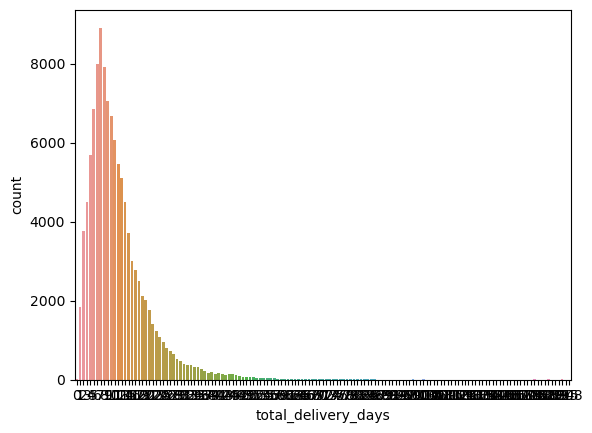

In [19]:
sns.countplot(x='total_delivery_days',data=olist_cleaned3)
plt.show()

As the distribution of total_delivery_days is skewed, the interquartile range method is used to remove outliers. 

In [20]:
#filtered data
import pandas as pd

Q1 = olist_cleaned3['total_delivery_days'].quantile(0.25)
Q3 = olist_cleaned3['total_delivery_days'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_data = olist_cleaned3[(olist_cleaned3['total_delivery_days'] >= lower_bound) & 
                               (olist_cleaned3['total_delivery_days'] <= upper_bound)]

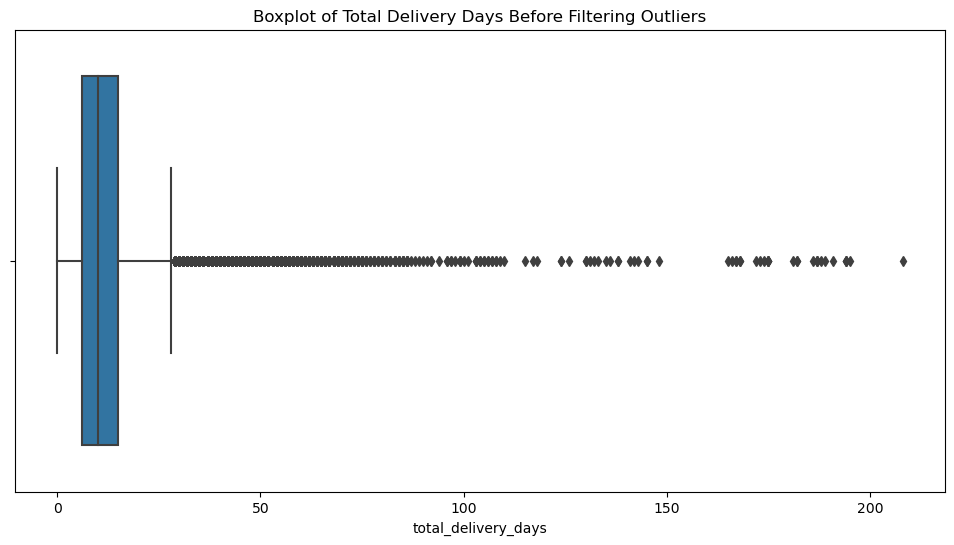

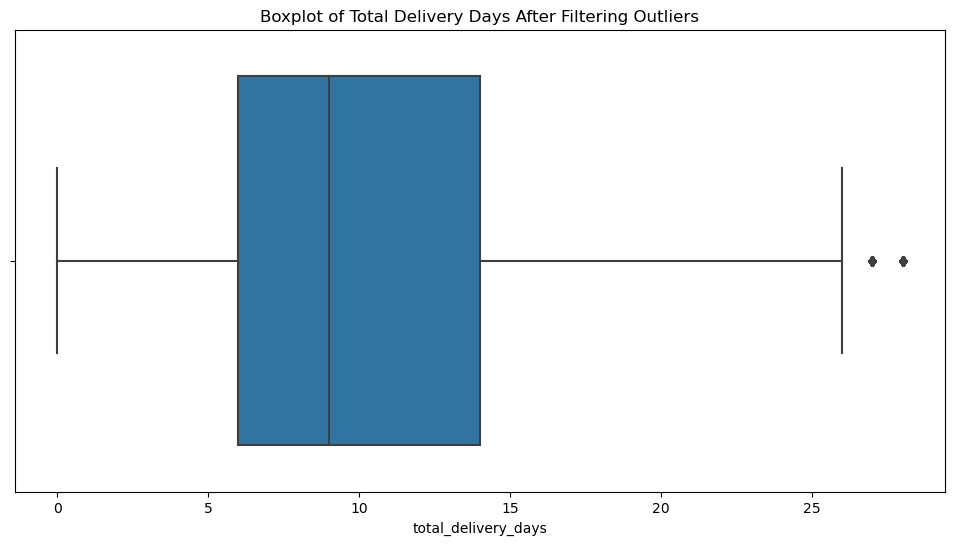

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot before filtering
plt.figure(figsize=(12, 6))
sns.boxplot(x=olist_cleaned3['total_delivery_days'])
plt.title('Boxplot of Total Delivery Days Before Filtering Outliers')
plt.show()

# Plot after filtering
plt.figure(figsize=(12, 6))
sns.boxplot(x=filtered_data['total_delivery_days'])
plt.title('Boxplot of Total Delivery Days After Filtering Outliers')
plt.show()

**Figure 2. Total Delivery Days from filtered data**

Distribution of total_delivery_days from purchase to customer location

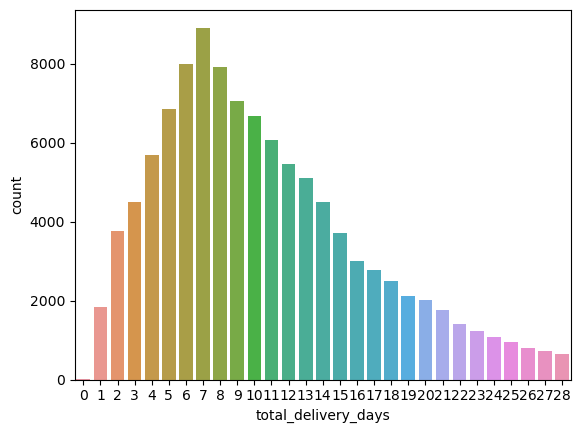

In [22]:
sns.countplot(x='total_delivery_days',data=filtered_data)
plt.show()

In [23]:
#calculate data after removing outliers
initial_count = olist_cleaned3.shape[0]
filtered_count = filtered_data.shape[0]

data_removed = initial_count - filtered_count

print(f'Initial data points: {initial_count}')
print(f'Data points after filtering: {filtered_count}')
print(f'Number of data points removed: {data_removed}')

Initial data points: 112645
Data points after filtering: 107105
Number of data points removed: 5540


### 2.4 Create dummy variables

In [24]:
# create a month dummy
filtered_data['month'] = filtered_data['order_purchase_timestamp'].dt.month
filtered_data['month_name'] = filtered_data['order_purchase_timestamp'].dt.strftime('%B')

# create a day of the week dummy
filtered_data['weekday'] = filtered_data['order_purchase_timestamp'].dt.dayofweek

filtered_data['weekdays_name'] = filtered_data['order_purchase_timestamp'].dt.day_name()

# create a day of the month dummy
filtered_data['dayofmonth'] = filtered_data['order_purchase_timestamp'].dt.day
filtered_data['year'] = filtered_data['order_purchase_timestamp'].dt.year


# create hour period dummy
filtered_data['hour'] = filtered_data['order_purchase_timestamp'].apply(lambda x: x.hour)
hours_time = [-0.1, 6, 12, 18, 23]
hours_period = ['Dawn', 'Morning', 'Afternoon', 'Night']
filtered_data['hour_period'] = pd.cut(filtered_data['hour'], hours_time, labels=hours_period)

### Feature 1: Month 

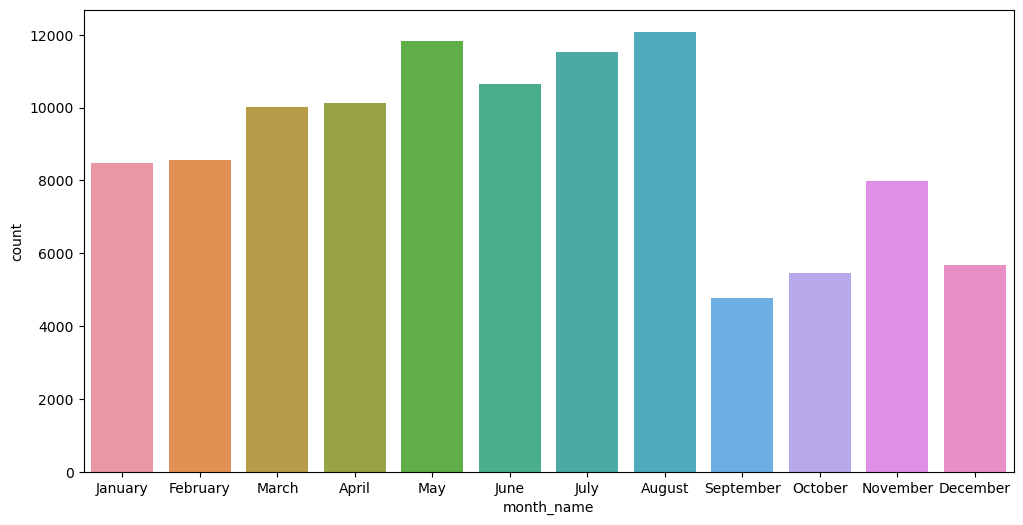

In [25]:
plt.figure(figsize=(12, 6))
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
ax = sns.countplot(x='month_name', data=filtered_data, order=month_order)
##boxplot only include late

### Feature 2: Hour_period

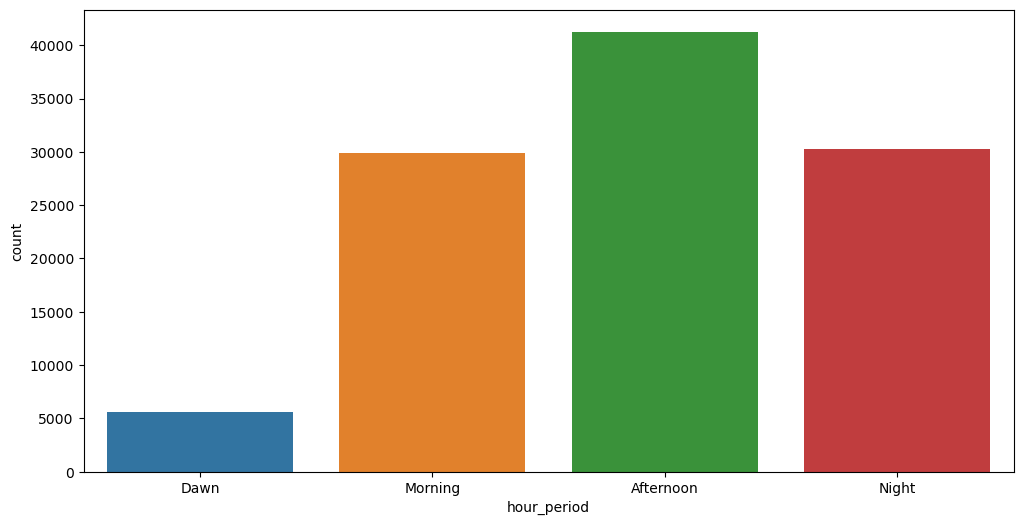

In [26]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='hour_period', data=filtered_data)

### Feature 3: Weekdays

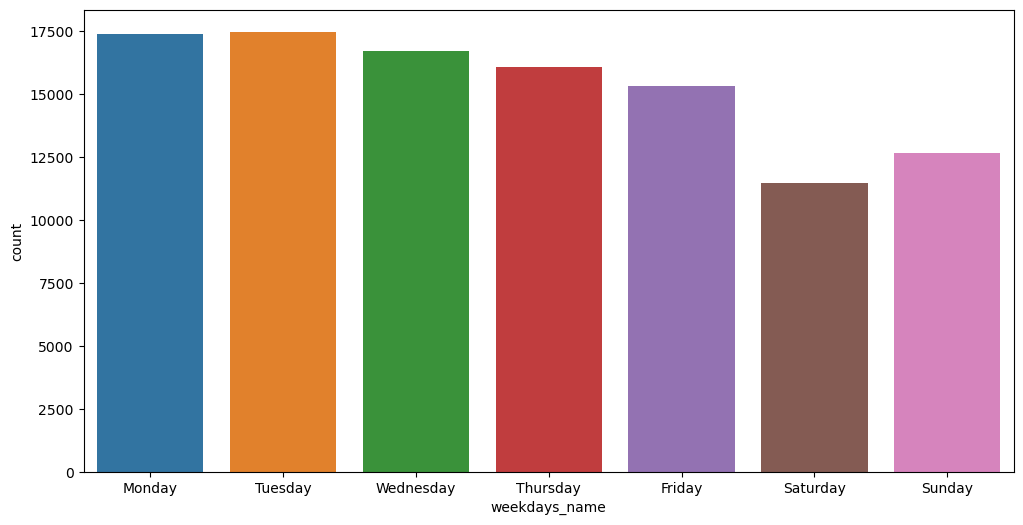

In [27]:
plt.figure(figsize=(12, 6))
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax = sns.countplot(x='weekdays_name', data=filtered_data,order=weekday_order)

### Feature 4: Customer Region

In [28]:
#customer location from customer_state
state_to_region = {
    'AC': 'North', 'AL': 'Northeast', 'AM': 'North', 'AP': 'North', 'BA': 'Northeast',
    'CE': 'Northeast', 'DF': 'Central-West', 'ES': 'Southeast', 'GO': 'Central-West',
    'MA': 'Northeast', 'MG': 'Southeast', 'MS': 'Central-West', 'MT': 'Central-West',
    'PA': 'North', 'PB': 'Northeast', 'PE': 'Northeast', 'PI': 'Northeast',
    'PR': 'South', 'RJ': 'Southeast', 'RN': 'Northeast', 'RO': 'North', 'RR': 'North',
    'RS': 'South', 'SC': 'South', 'SE': 'Northeast', 'SP': 'Southeast', 'TO': 'North'
}

filtered_data['customer_region'] = filtered_data['customer_state'].map(state_to_region)

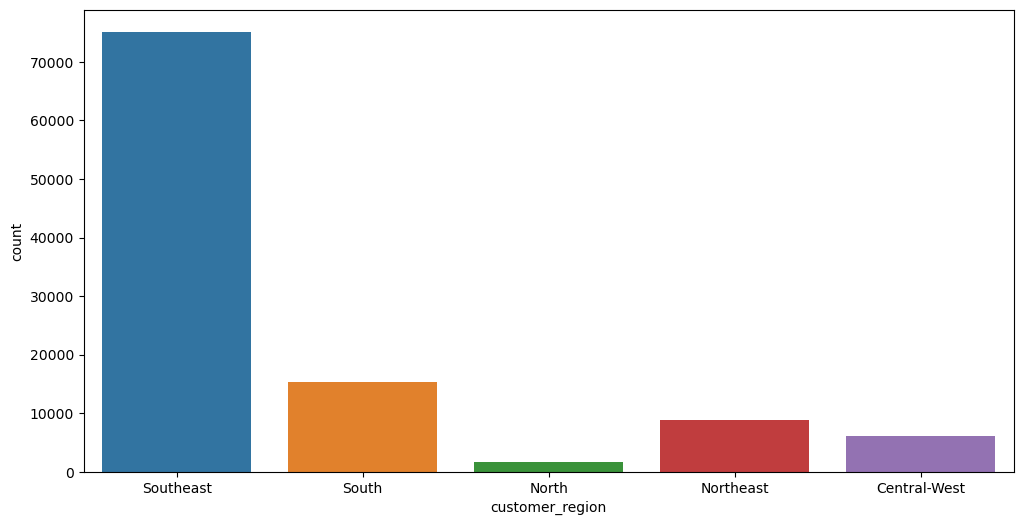

In [29]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='customer_region', data=filtered_data)

### Feature 5: Seller Region

In [30]:
#seller location from seller_state
state_to_region2 = {
    'AM': 'North', 'BA': 'Northeast', 'CE': 'Northeast', 'DF': 'Central-West', 
    'ES': 'Southeast', 'GO': 'Central-West', 'MA': 'Northeast', 'MG': 'Southeast', 
    'MS': 'Central-West', 'MT': 'Central-West', 'PA': 'North', 'PB': 'Northeast', 
    'PE': 'Northeast', 'PI': 'Northeast', 'PR': 'South', 'RJ': 'Southeast', 
    'RN': 'Northeast', 'RO': 'North', 'RS': 'South', 'SC': 'South', 'SE': 'Northeast', 
    'SP': 'Southeast'
}

filtered_data['seller_region'] = filtered_data['seller_state'].map(state_to_region2)

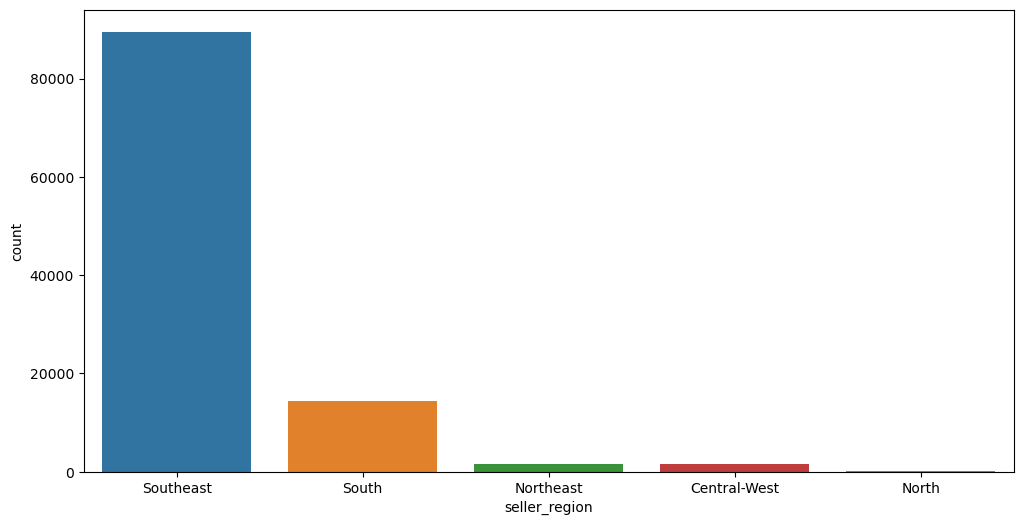

In [31]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='seller_region', data=filtered_data)

### Feature 6: Product_Category

In [32]:
# select categories within the 99th percentile
category_counts = filtered_data['product_category_name_english'].value_counts()
cumulative_percentage = category_counts.cumsum() / category_counts.sum() * 100

#create list for 99th percentile category
categories_to_keep = cumulative_percentage[cumulative_percentage <= 99].index.tolist()

# create categories for the 1% as 'others'
filtered_data['product_category_name_english'] = filtered_data['product_category_name_english'].apply(
    lambda x: x if x in categories_to_keep else 'others'
)
print(filtered_data['product_category_name_english'].value_counts())

product_category_name_english
bed_bath_table                             11085
health_beauty                               9216
sports_leisure                              8328
furniture_decor                             8117
computers_accessories                       7488
housewares                                  6898
watches_gifts                               5671
telephony                                   4316
garden_tools                                4217
auto                                        4031
toys                                        3939
cool_stuff                                  3678
perfumery                                   3300
baby                                        2898
electronics                                 2563
stationery                                  2393
fashion_bags_accessories                    2021
pet_shop                                    1912
office_furniture                            1463
others                                 

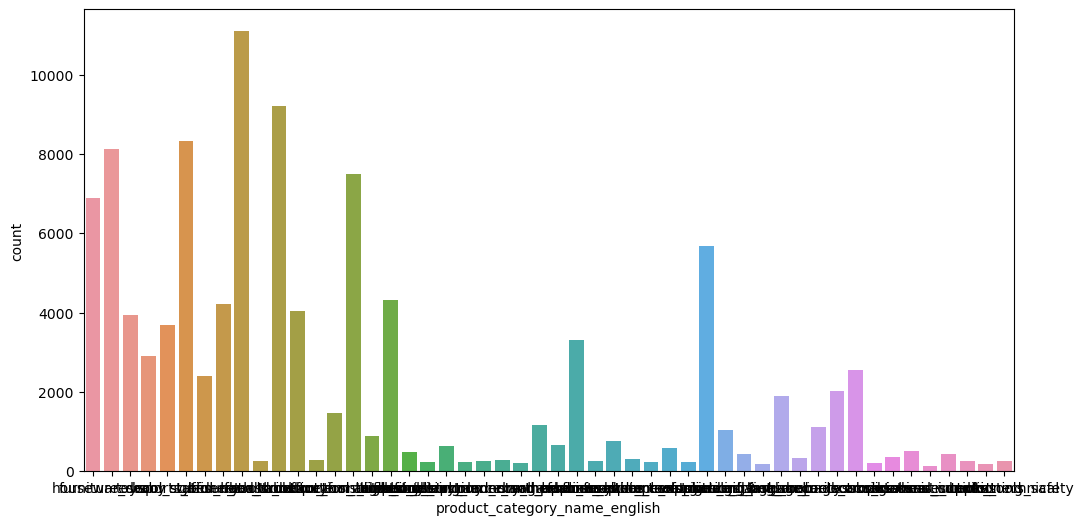

In [33]:
plt.figure(figsize=(12, 6))
sns.countplot(x='product_category_name_english', data=filtered_data)
plt.show()

## 2.5 Feature Scaling

### Feature 7: Product Weight

In [34]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
filtered_data['scaled_product_weight_g'] = scaler.fit_transform(filtered_data[['product_weight_g']])

In [35]:
filtered_data['scaled_product_weight_g'].describe().round(2)

count    107105.00
mean          0.05
std           0.09
min           0.00
25%           0.01
50%           0.02
75%           0.04
max           1.00
Name: scaled_product_weight_g, dtype: float64

### Feature 8: Product Volume (width, length, height)

In [36]:
#calculate product volume
filtered_data['product_volume'] = filtered_data['product_length_cm'] * filtered_data['product_width_cm'] * filtered_data['product_height_cm']
filtered_data = filtered_data.drop(columns=['product_length_cm','product_width_cm','product_height_cm'])

In [37]:
#feature scaling
scaler = MinMaxScaler()
filtered_data['scaled_product_volume'] = scaler.fit_transform(filtered_data[['product_volume']])

In [38]:
filtered_data['scaled_product_volume'].describe().round(2)

count    107105.00
mean          0.05
std           0.08
min           0.00
25%           0.01
50%           0.02
75%           0.06
max           1.00
Name: scaled_product_volume, dtype: float64

### Feature 9: Shipping distance 

In [39]:
from geopy.distance import geodesic
import pandas as pd

In [40]:
def calculate_distance(row):
    # Define the origin and destination using the seller's and customer's latitudes and longitudes
    origin = (row["seller_geolocation_lat"], row["seller_geolocation_lng"])
    destination = (row["customer_geolocation_lat"], row["customer_geolocation_lng"])
    
    # Calculate geodesic distance
    return geodesic(origin, destination).kilometers

In [41]:
filtered_data['distance_km'] = filtered_data.apply(calculate_distance, axis=1)

In [42]:
#feature scaling
scaler = MinMaxScaler()
filtered_data['scaled_distance_km'] = scaler.fit_transform(filtered_data[['distance_km']])

In [43]:
filtered_data['scaled_distance_km'].describe().round(2)

count    107105.00
mean          0.07
std           0.07
min           0.00
25%           0.02
50%           0.05
75%           0.09
max           1.00
Name: scaled_distance_km, dtype: float64

## 2.6 Feature Engineering

### Feature 10: Weather
Weather Conditions: Integrate using an API.

In [44]:
import requests
import csv
import sys
from io import StringIO

# Fetch weather data via API (This is just a placeholder for the correct URL and your API key)
weather_response = requests.get("https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/-23.57698293467452%2C-46.587161274276774/2016-10-01/2018-11-01?unitGroup=metric&include=days&key=3PTMTT7NN3FP9HWY2V5A327UJ&contentType=csv")

# Check for successful response
if weather_response.status_code != 200:
    print('Unexpected Status code:', weather_response.status_code)
    sys.exit()

# Parse the CSV response
csv_data = StringIO(weather_response.text)
csv_reader = csv.DictReader(csv_data)

# Process the weather data to find days with rain
rainy_days = set()
for row in csv_reader:
    if row['preciptype'] == 'rain':
        # If there's any precipitation logged, consider it a rainy day
        rainy_days.add(row['datetime'])

In [45]:
# Assume 'order_delivered_customer_date' is a datetime column in merged_df
# You will need to iterate through the dataset and check each delivery date and the two days before

def was_rainy_on_delivery(date_str, rainy_days_set):
    # Check if the string is a valid date
    if pd.isnull(date_str):
        return 0
    
    # Convert the string to a datetime object
    delivery_date = pd.to_datetime(date_str).date()
    
    # Check the delivery day and two days prior for rain
    for days_before in range(3):  # Check delivery day and two days before
        check_date = delivery_date - pd.Timedelta(days=days_before)
        if str(check_date) in rainy_days_set:
            return 1
    return 0

# Create the binary feature
filtered_data['rain_on_delivery'] = filtered_data['order_delivered_customer_date'].apply(
    lambda x: was_rainy_on_delivery(x, rainy_days)
)

In [46]:
# weather data from file retail_data_weather.csv 
import pandas as pd
weather_data = pd.read_csv("retail_data_weather.csv")

#change data type
weather_data['order_delivered_customer_date'] = pd.to_datetime(weather_data.order_delivered_customer_date)

In [47]:
filtered_data = pd.merge(filtered_data, weather_data[['order_delivered_customer_date', 'rain_on_delivery']], 
                       how='left', on='order_delivered_customer_date')

In [48]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108958 entries, 0 to 108957
Data columns (total 47 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       108958 non-null  object        
 1   customer_id                    108958 non-null  object        
 2   order_purchase_timestamp       108958 non-null  datetime64[ns]
 3   order_delivered_customer_date  108958 non-null  datetime64[ns]
 4   order_estimated_delivery_date  108958 non-null  datetime64[ns]
 5   customer_unique_id             108958 non-null  object        
 6   customer_zip_code_prefix       108958 non-null  int64         
 7   customer_city                  108958 non-null  object        
 8   customer_state                 108958 non-null  object        
 9   order_item_id                  108958 non-null  int64         
 10  product_id                     108958 non-null  object        
 11  

### Feature 11: Holiday

Integration with External Data Sources: Include via a CSV file "Festivals and Public Holidays".

In [49]:
holidays_df = pd.read_csv('Brazil_holiday.csv', parse_dates=['DATE'])

# Create a date range for holidays considering 5 days before and after
holiday_range = pd.concat([
    (holidays_df['DATE'] + pd.Timedelta(days=delta)).dt.date
    for delta in range(-5, 6)
]).drop_duplicates()

# Create a binary feature for whether the order was made on a holiday or within the 5 days before/after
filtered_data['purchase_on_holiday'] = filtered_data['order_purchase_timestamp'].dt.date.isin(holiday_range).astype(int)
filtered_data['delivery_on_holiday'] = filtered_data['order_delivered_customer_date'].dt.date.isin(holiday_range).astype(int)

# Display the first few entries to ensure the 'is_holiday' feature has been added correctly
filtered_data[['order_purchase_timestamp', 'purchase_on_holiday','delivery_on_holiday','order_delivered_customer_date']]

,order_purchase_timestamp,purchase_on_holiday,delivery_on_holiday,order_delivered_customer_date
0,2017-10-02 10:56:33,0,1,2017-10-10 21:25:13
1,2017-10-02 10:56:33,0,1,2017-10-10 21:25:13
2,2017-10-02 10:56:33,0,1,2017-10-10 21:25:13
3,2017-08-15 18:29:31,0,0,2017-08-18 14:44:43
4,2017-08-02 18:24:47,0,0,2017-08-07 18:30:01
...,...,...,...,...
108953,2018-08-21 11:29:05,0,0,2018-08-24 13:06:25
108954,2018-07-28 17:55:27,0,0,2018-08-03 17:46:46
108955,2018-08-23 12:31:37,0,0,2018-08-28 02:06:35
108956,2018-07-23 18:35:14,0,0,2018-07-27 14:04:10


## 2.7 Class imbalance Oversampling

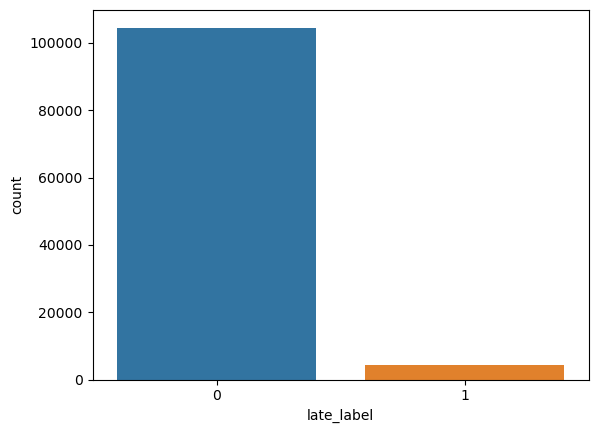

In [50]:
#delay exact calculation
filtered_data['delayed_exact']= (filtered_data.order_delivered_customer_date- filtered_data.order_estimated_delivery_date)
filtered_data['late_label'] = np.where(filtered_data['delayed_exact'] > pd.Timedelta(0), 1, 0)
sns.countplot(x='late_label', data=filtered_data)
plt.show()

In [51]:
filtered_data['late_label'].value_counts() /filtered_data['late_label'].count() * 100

late_label
0    95.966336
1     4.033664
Name: count, dtype: float64

## 3.Test Train split

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


# Model evaluation und visualisation
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

# Hyperparameter optimisation
from sklearn.model_selection import GridSearchCV

# to make this notebook's output stable across runs
np.random.seed(42)

In [57]:
#select features
feature_to_select = [
    'month_name', 
    'hour_period', 
    'weekdays_name', 
    'late_label', 
    'customer_region', 
    'seller_region', 
    'product_category_name_english', 
    'scaled_product_weight_g', 
    'scaled_product_volume',
    'scaled_distance_km',
    'rain_on_delivery_x',
    'delivery_on_holiday',
    'purchase_on_holiday'
]

In [58]:
new_df = filtered_data[feature_to_select]

In [59]:
new_df['hour_period'] = new_df['hour_period'].astype('object')

In [60]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108958 entries, 0 to 108957
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   month_name                     108958 non-null  object 
 1   hour_period                    108958 non-null  object 
 2   weekdays_name                  108958 non-null  object 
 3   late_label                     108958 non-null  int64  
 4   customer_region                108958 non-null  object 
 5   seller_region                  108958 non-null  object 
 6   product_category_name_english  108958 non-null  object 
 7   scaled_product_weight_g        108958 non-null  float64
 8   scaled_product_volume          108958 non-null  float64
 9   scaled_distance_km             108958 non-null  float64
 10  rain_on_delivery_x             108958 non-null  int64  
 11  delivery_on_holiday            108958 non-null  int64  
 12  purchase_on_holiday           

In [61]:
new_df.apply(pd.Series.nunique)

month_name                          12
hour_period                          4
weekdays_name                        7
late_label                           2
customer_region                      5
seller_region                        5
product_category_name_english       50
scaled_product_weight_g           2134
scaled_product_volume             4337
scaled_distance_km               85128
rain_on_delivery_x                   2
delivery_on_holiday                  2
purchase_on_holiday                  2
dtype: int64

In [62]:
new_df.isnull().sum()

month_name                       0
hour_period                      0
weekdays_name                    0
late_label                       0
customer_region                  0
seller_region                    0
product_category_name_english    0
scaled_product_weight_g          0
scaled_product_volume            0
scaled_distance_km               0
rain_on_delivery_x               0
delivery_on_holiday              0
purchase_on_holiday              0
dtype: int64

### 3.1 Feature Encoding

In [63]:
#drop first category in each feature
new_df = pd.get_dummies(new_df, columns=['month_name','hour_period','weekdays_name',
                                         'customer_region','seller_region','product_category_name_english'], 
                        drop_first = True)

In [64]:
new_df.describe()

,late_label,scaled_product_weight_g,scaled_product_volume,scaled_distance_km,rain_on_delivery_x,delivery_on_holiday,purchase_on_holiday
count,108958.000000,108958.000000,108958.000000,108958.000000,108958.000000,108958.000000,108958.000000
mean,0.040337,0.050999,0.050372,0.065836,0.415839,0.243773,0.269462
std,0.196748,0.091232,0.077645,0.065005,0.492868,0.429359,0.443682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.007421,0.009080,0.019412,0.000000,0.000000,0.000000
50%,0.000000,0.017316,0.021575,0.048325,0.000000,0.000000,0.000000
75%,0.000000,0.044527,0.060343,0.087817,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 3.2 Feature Selection

In [65]:
olist_label = new_df['late_label'].copy()
olist_features = new_df.drop('late_label', axis=1)

In [66]:
olist_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108958 entries, 0 to 108957
Data columns (total 83 columns):
 #   Column                                                                 Non-Null Count   Dtype  
---  ------                                                                 --------------   -----  
 0   scaled_product_weight_g                                                108958 non-null  float64
 1   scaled_product_volume                                                  108958 non-null  float64
 2   scaled_distance_km                                                     108958 non-null  float64
 3   rain_on_delivery_x                                                     108958 non-null  int64  
 4   delivery_on_holiday                                                    108958 non-null  int64  
 5   purchase_on_holiday                                                    108958 non-null  int64  
 6   month_name_August                                                      10895

### 3.3 Class imbalance Oversampling

<Axes: xlabel='late_label', ylabel='count'>

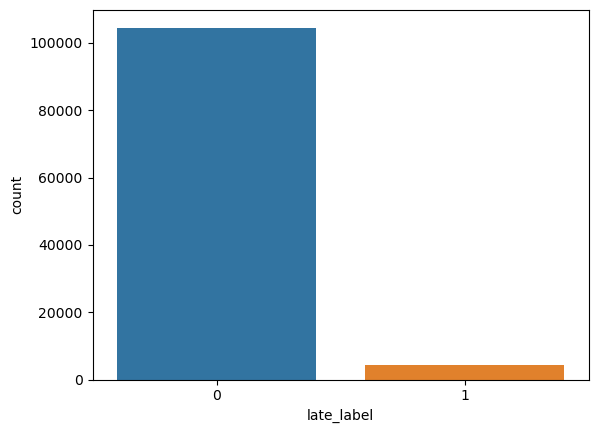

In [67]:
#Oversampling method for response and features
response = 'late_label'
y = new_df[[response]]
features = list(new_df.columns)
features.remove(response)

sns.countplot(x=response, data=new_df)

In [68]:
y = new_df[response]
X= new_df[features]

class_count_0, class_count_1 = new_df[response].value_counts()

# class of late_label
class_0 = new_df[new_df[response] == 0]
class_1 = new_df[new_df[response] == 1]

print('class 0:', class_count_0)
print('class 1:', class_count_1)

class 0: 104563
class 1: 4395


In [69]:
# Oversample class 1 
y_1 = class_1[response].sample(n=class_count_0, replace=True, random_state=2)
y_0 = class_0[response]

print('class 0:', y_0.shape)
print('class 1:', y_1.shape)

# Combine oversampled class 1
y_oversampled = pd.concat([y_0,y_1])
X_oversampled = X.loc[y_oversampled.index]

# Combine features and response into a new DataFrame
olist_oversample = pd.concat([X_oversampled, y_oversampled], axis=1)
len(olist_oversample)

class 0: (104563,)
class 1: (104563,)


209126

<Axes: xlabel='late_label', ylabel='count'>

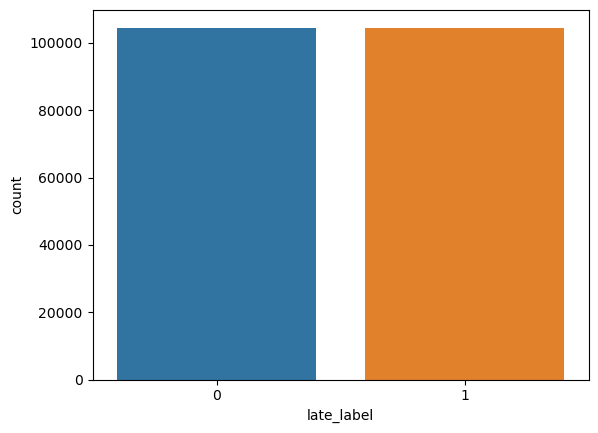

In [70]:
sns.countplot(x=response, data=olist_oversample)

In [71]:
olist_oversample.to_csv('olist_oversample_complete.csv', index=False)

In [72]:
print(olist_oversample.shape)

(209126, 84)


## Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd

# Load the dataset
file_path = 'olist_oversample_complete.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,scaled_product_weight_g,scaled_product_volume,scaled_distance_km,rain_on_delivery,delivery_on_holiday,purchase_on_holiday,month_name_August,month_name_December,month_name_February,month_name_January,...,product_category_name_english_perfumery,product_category_name_english_pet_shop,product_category_name_english_signaling_and_security,product_category_name_english_small_appliances,product_category_name_english_sports_leisure,product_category_name_english_stationery,product_category_name_english_telephony,product_category_name_english_toys,product_category_name_english_watches_gifts,late_label
0,0.012369,0.006107,0.002146,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.012369,0.006107,0.002146,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.012369,0.006107,0.002146,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.012369,0.006107,0.001827,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.012369,0.006107,0.002693,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


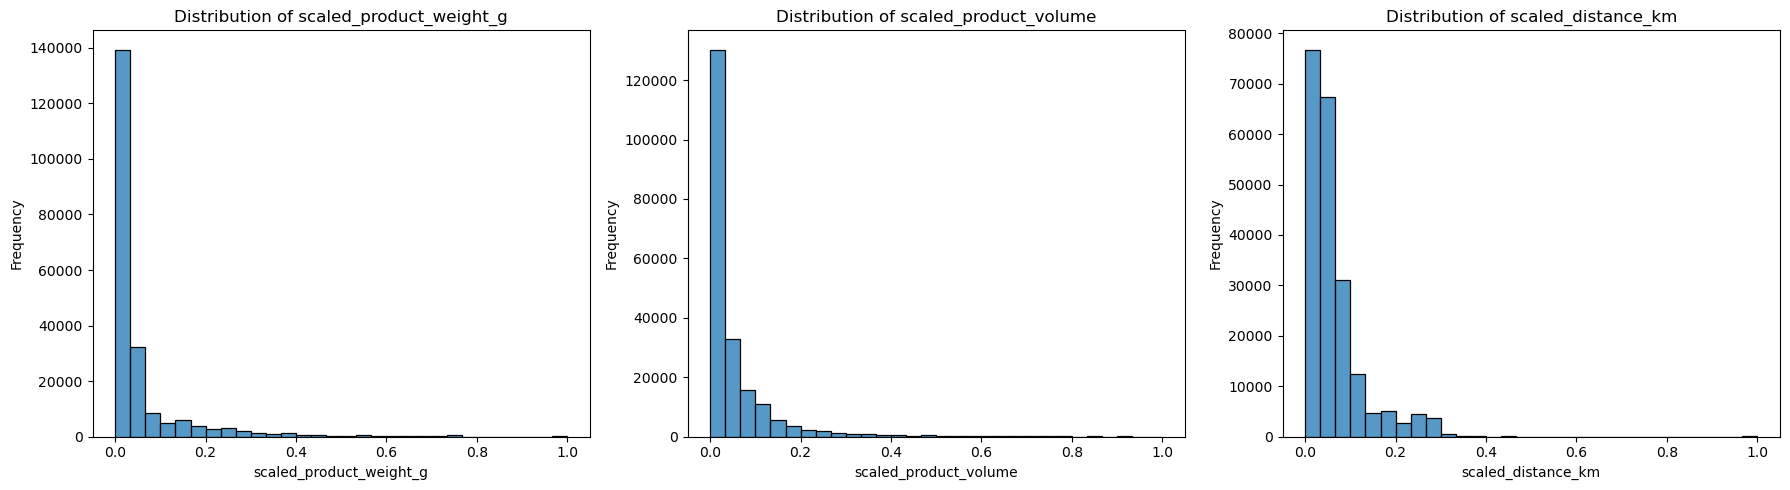

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(18, 5))

# Names of the features to plot
features = ['scaled_product_weight_g', 'scaled_product_volume', 'scaled_distance_km']

# Create a 1x3 subplot
for i, feature in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[feature], kde=False, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

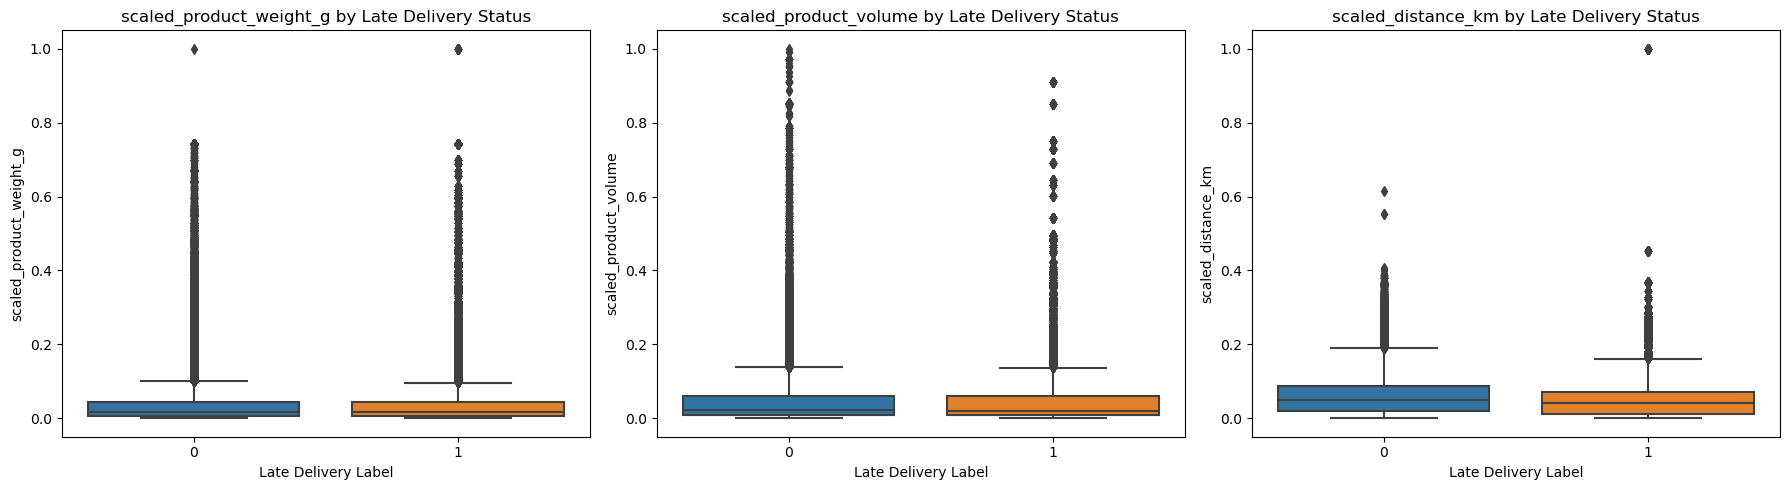

In [3]:
# Set up the matplotlib figure
plt.figure(figsize=(18, 5))

# Create a 1x3 subplot for box plots
for i, feature in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='late_label', y=feature, data=data)
    plt.title(f'{feature} by Late Delivery Status')
    plt.xlabel('Late Delivery Label')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


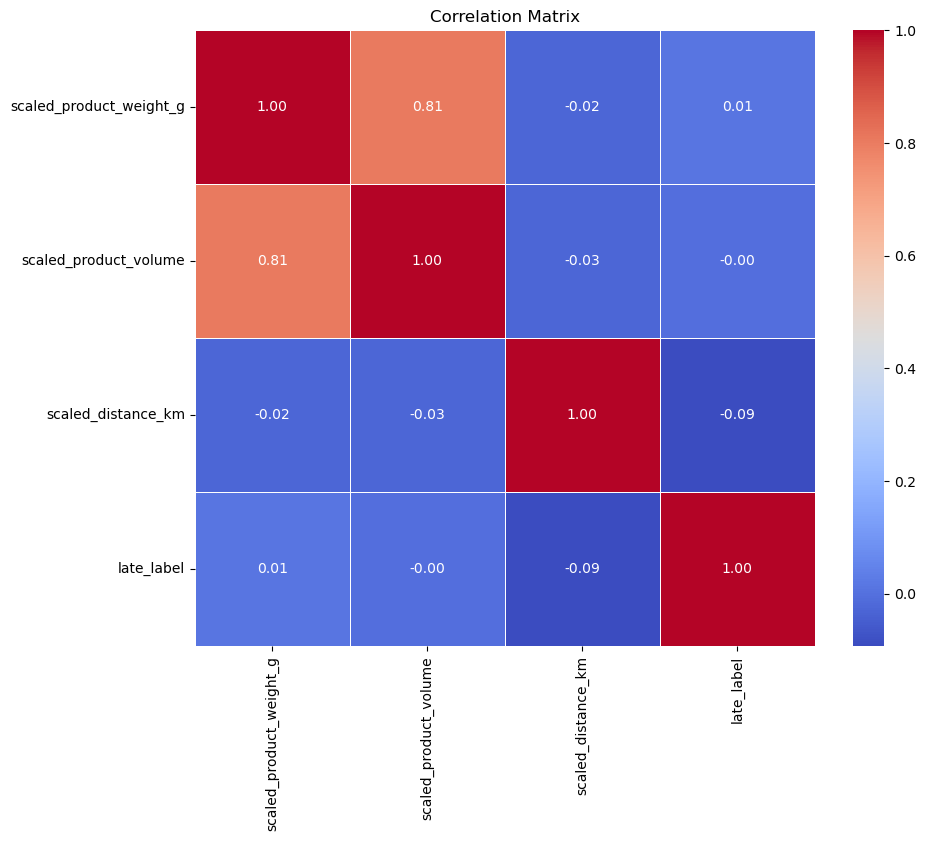

In [4]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Focus on correlations with the target variable and key features
selected_features = ['scaled_product_weight_g', 'scaled_product_volume', 'scaled_distance_km', 'late_label']
correlation_submatrix = correlation_matrix.loc[selected_features, selected_features]

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_submatrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


## 5. Machine Learning Algorithms

In [73]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# seperate features and target
X = new_df.drop('late_label', axis=1)
y = new_df['late_label']

# Convert DataFrame to NumPy array to ensure compatibility
X = np.ascontiguousarray(X.to_numpy())
y = np.ascontiguousarray(y.to_numpy())

### 5.1 Initial Model Selection

In [74]:
# Initialize models
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()
naive_bayes = GaussianNB()
random_forest = RandomForestClassifier()
knn = KNeighborsClassifier()

### 5.2 Cross-Validation

In [80]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Perform 5-fold cross-validation for each initial model
models = [('Logistic Regression', logistic_regression), 
          ('Decision Tree', decision_tree),
          ('KNN', knn), 
          ('Naive Bayes', naive_bayes), 
          ('Random Forest', random_forest)]

for name, model in models:
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"{name} Cross-Validation Accuracy: {scores.mean()}")

Logistic Regression Cross-Validation Accuracy: 0.9598138193260783
Decision Tree Cross-Validation Accuracy: 0.9387963812770421
KNN Cross-Validation Accuracy: 0.9579913465320571
Naive Bayes Cross-Validation Accuracy: 0.5781303264717451
Random Forest Cross-Validation Accuracy: 0.9672348236528123


### 5.3 Fine-Tune Hyperparameters for Random Forest

In [81]:
# Hyperparameters grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Perform Grid Search Cross-Validation for Random Forest
grid_search_rf = GridSearchCV(random_forest, param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)

# Get best estimator and its accuracy
best_rf_model = grid_search_rf.best_estimator_
best_params_rf = grid_search_rf.best_params_
print("Best Random Forest Model:", best_rf_model)
print("Best Hyperparameters for Random Forest:", best_params_rf)
print("Best Random Forest Model Accuracy:", grid_search_rf.best_score_)

Best Random Forest Model: RandomForestClassifier(n_estimators=200)
Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best Random Forest Model Accuracy: 0.9671299331322931


## 6. Model Evaluation

Confusion Matrix (y_test and y_pred)

ROC and AUC (fpr and tpr false positive rate and true positive rate)

In [83]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

model_list = ['Logistic Regression', 'Decision Tree', 'KNN', 'Naive Bayes', 'Random Forest']
models = [LogisticRegression(), DecisionTreeClassifier(), KNeighborsClassifier(), GaussianNB(), RandomForestClassifier()]

acc_list = []
auc_list = []
cm_list = []

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_list.append(metrics.accuracy_score(y_test, y_pred))
    fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    auc_list.append(round(metrics.auc(fpr, tpr), 2))
    cm_list.append(confusion_matrix(y_test, y_pred))

for i, model_name in enumerate(model_list):
    print(f"Model: {model_name}")
    print(f"Accuracy: {acc_list[i]}")
    print(f"AUC: {auc_list[i]}")
    print(f"Confusion Matrix:\n{cm_list[i]}\n")


Model: Logistic Regression
Accuracy: 0.9593122858541361
AUC: 0.5
Confusion Matrix:
[[31358     0]
 [ 1330     0]]

Model: Decision Tree
Accuracy: 0.9373164464023495
AUC: 0.63
Confusion Matrix:
[[30245  1113]
 [  936   394]]

Model: KNN
Accuracy: 0.9577214880078316
AUC: 0.54
Confusion Matrix:
[[31205   153]
 [ 1229   101]]

Model: Naive Bayes
Accuracy: 0.6562041116005873
AUC: 0.63
Confusion Matrix:
[[20654 10704]
 [  534   796]]

Model: Random Forest
Accuracy: 0.9662567302985805
AUC: 0.59
Confusion Matrix:
[[31332    26]
 [ 1077   253]]

